# Proyecto: Series de tiempo (Análisis de datos reales del COVID-19)

## Vermos algunas funciones útiles como:

`to_datetime()` -> permite transformar valores de una columna al tipo 'DateTime'

`pd.Grouper(key='column_name' , freq=' ')` -> esta función va dentro de 'groupby'. La columna indicada en 'key' es de tipo datetime y nos permite extraer información con una frecuencia específica. 

`resample(' ')` -> esta función se aplica cuando los índices de un dataframe son del tipo 'DateTime' y sirve para extraer información con una periodicidad específica.

`.hist()` -> genera el histograma de un dataframe

`.plot(kind = 'kde' )` -> genera la gráfica de la función de distribución de un dataframe

`.plot(kind = 'pie' )` -> genera la gráfica de pastel de un dataframe

`.plot(kind='bar' )` -> genera la gráfica de barras de un dataframe
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Cargamos datos:
df = pd.read_csv('./db/COVID_19/covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
# Vemos que las columnas de fechas son del tipo 'object' así que las convertimos al tipo 'date_time':
df['ObservationDate'] = pd.to_datetime( df['ObservationDate'] )

df['Last Update'] = pd.to_datetime( df['Last Update'] )

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [7]:
# Nos quedamos sólo con algunas columnas:
df = df[['ObservationDate', 'Country/Region' , 'Confirmed', 'Deaths','Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [8]:
# Verfificamos que se hayan guardado los cambios:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Country/Region   306429 non-null  object        
 2   Confirmed        306429 non-null  float64       
 3   Deaths           306429 non-null  float64       
 4   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 11.7+ MB


¿Cuáles son los 20 países con mayor registro de casos?

In [9]:
# Extraemos la suma de casos confirmados agrupados por '['Country/Region']':
df.groupby(['Country/Region'])[['Confirmed']].sum()

,Confirmed
Country/Region,
Azerbaijan,1.0
"('St. Martin',)",2.0
Afghanistan,17026442.0
Albania,19768869.0
Algeria,27684358.0
...,...
West Bank and Gaza,41819444.0
Yemen,962066.0
Zambia,13493953.0


In [10]:
# Ordenamos de mayor a menor:
df_pais = df.groupby(['Country/Region'])[['Confirmed']].sum().sort_values('Confirmed', ascending=False)

# Extraemos el registro de los primeros 20 países con mayor registro de casos:
df_pais.head(20)

,Confirmed
Country/Region,
US,6.049146e+09
India,3.226768e+09
Brazil,2.653588e+09
Russia,9.305488e+08
France,8.551890e+08
UK,7.837944e+08
Spain,6.491118e+08
Italy,6.366943e+08
Turkey,6.189410e+08


El país con el mayor numero de casos resgistrados es United States (US)

In [11]:
df_pais.loc['Mexico']

Confirmed    460463678.0
Name: Mexico, dtype: float64

In [12]:
# Obtenemos la suma de casos Confirmados, muertes y recuperados, 
# agrupados por 'Country/Region' y 'ObservationDate' (con una frecuencia de cada 5 días)

df_time = df.groupby(
    ['Country/Region', pd.Grouper(key='ObservationDate' , freq='5d')]
    )[['Confirmed','Deaths','Recovered']].sum()


# La función 'pd.Grouper' que nos permite elegir alguna frecuencia para mostrar los datos,
# por ejemplo:
# freq='7d' <- registro por cada 7 dias 
# freq='1M' <- registro por cada 1 mes 
# freq='2Y' <- registro por cada 2 años 
    
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-26             1.0     0.0        0.0
('St. Martin',)                2020-03-07             2.0     0.0        0.0
Afghanistan                    2020-02-21             2.0     0.0        0.0
                               2020-02-26             5.0     0.0        0.0
                               2020-03-02            15.0     0.0        0.0
...                                                   ...     ...        ...
Zimbabwe                       2021-05-21        193427.0  7931.0   182321.0
                               2021-05-26        155524.0  6367.0   146213.0
occupied Palestinian territory 2020-03-07            25.0     0.0        0.0
                               2020-03-12             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[17601 rows x 3 columns]

In [15]:
# Extraemos los datos de Mexico:
df_Mexico = df_time.loc['Mexico']
df_Mexico

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,0.0,0.0,0.0
2020-02-26,10.0,0.0,0.0
2020-03-02,26.0,0.0,4.0
2020-03-07,35.0,0.0,11.0
2020-03-12,144.0,0.0,20.0
...,...,...,...
2021-05-06,11817610.0,1093832.0,9420410.0
2021-05-11,11873676.0,1099357.0,9477100.0
2021-05-16,11927832.0,1103606.0,9527132.0


<AxesSubplot:title={'center':'covid-19 Mexico'}, xlabel='ObservationDate'>

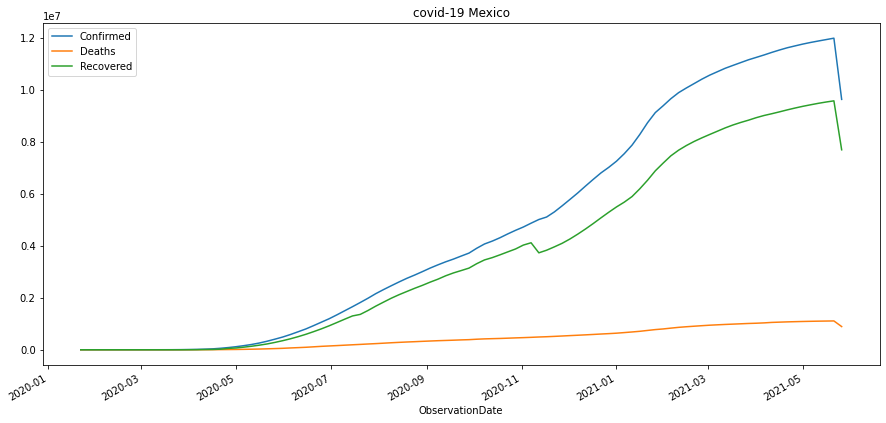

In [16]:
df_Mexico.plot(figsize=(15,7) , title = 'covid-19 Mexico')

Text(0, 0.5, 'People')

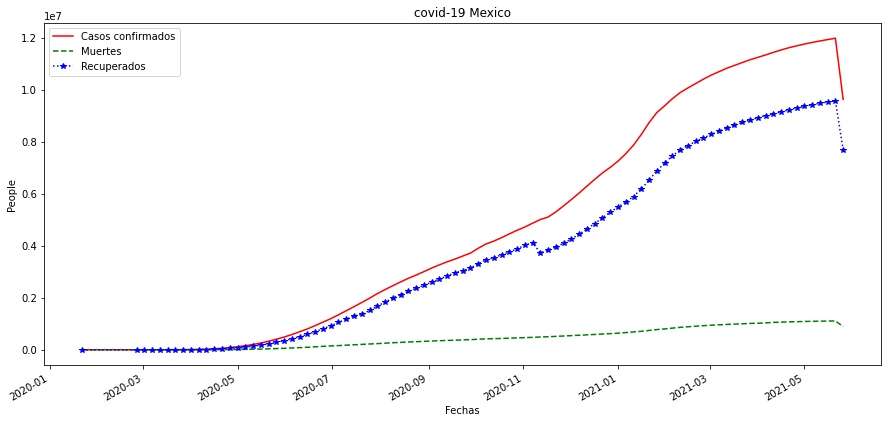

In [17]:
ax = df_Mexico.plot(figsize=(15,7) , title = 'covid-19 Mexico' , legend=False , style = ['r-','g--','b:*'] )

ax.legend(['Casos confirmados','Muertes','Recuperados'])
plt.xlabel('Fechas')
plt.ylabel('People')


In [18]:
# Debido a que los índices del dataframe 'df_Mexico_monthly' son de tipo 'datetime', 
# podemos realizar muestreos de infomación con una periodicidad dada, usando 'resample()':
# resample('d') # día
# resample('M') # mes
# resample('Y') # año

# Grafica en muestreo mensual:

df_Mexico_monthly = df_Mexico.resample('M').sum()
df_Mexico_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,10.0,0.0,0.0
2020-03-31,6916.0,108.0,157.0
2020-04-30,220185.0,18449.0,98988.0
2020-05-31,1958022.0,210563.0,1332197.0
2020-06-30,5262458.0,635512.0,3942473.0
2020-07-31,10457093.0,1189560.0,8072663.0
2020-08-31,16007967.0,1737040.0,13012101.0
2020-09-30,20593564.0,2176005.0,17296974.0


<AxesSubplot:xlabel='ObservationDate'>

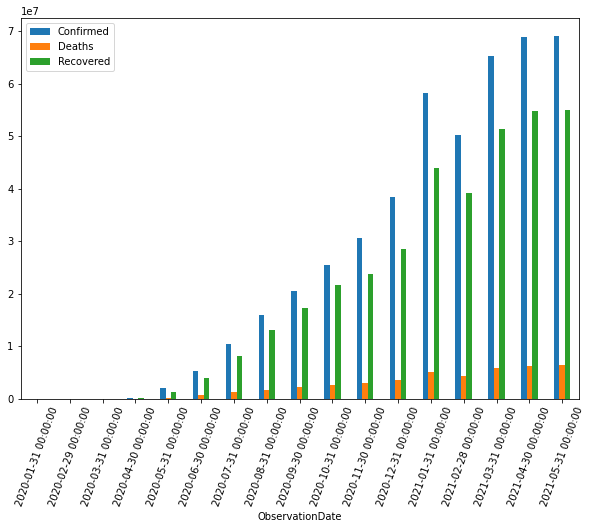

In [19]:
# 'rot=70' #<-- indica que los labels tengan una rotación de 70 grados
df_Mexico_monthly.plot(kind='bar', figsize=(10,7),rot=70)

<AxesSubplot:xlabel='ObservationDate'>

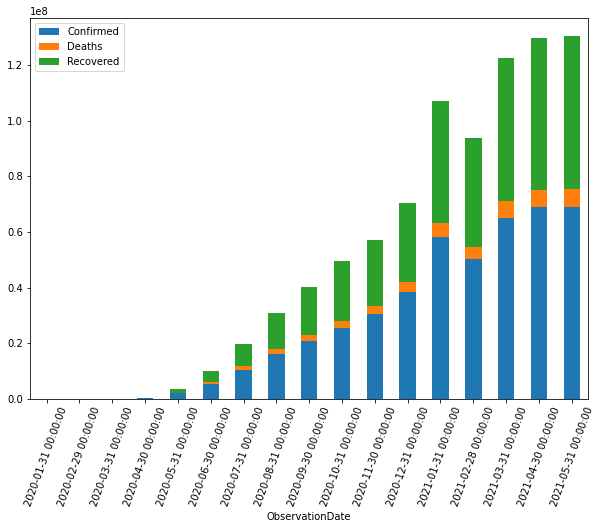

In [20]:
df_Mexico_monthly.plot(kind='bar', figsize=(10,7) , stacked = True, rot=70)

In [21]:
# Agregamos una columna de personas que han recibido tratamiento:
df_Mexico_monthly['Traitment'] = df_Mexico_monthly['Confirmed'] - df_Mexico_monthly['Deaths']
df_Mexico_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,0.0,0.0,0.0,0.0
2020-02-29,10.0,0.0,0.0,10.0
2020-03-31,6916.0,108.0,157.0,6808.0
2020-04-30,220185.0,18449.0,98988.0,201736.0
2020-05-31,1958022.0,210563.0,1332197.0,1747459.0
2020-06-30,5262458.0,635512.0,3942473.0,4626946.0
2020-07-31,10457093.0,1189560.0,8072663.0,9267533.0
2020-08-31,16007967.0,1737040.0,13012101.0,14270927.0
2020-09-30,20593564.0,2176005.0,17296974.0,18417559.0


Ejemplos de gráficas de pastel:

array([<AxesSubplot:ylabel='2020-06-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-07-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-08-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-09-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-10-31 00:00:00'>], dtype=object)

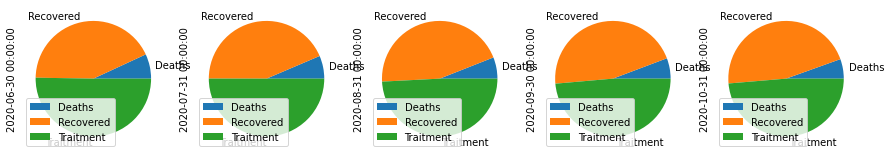

In [22]:
# Graficamos sólo los registros del 5 al 10:
df_Mexico_monthly[['Deaths','Recovered','Traitment']].iloc[5:10].T.plot(kind = 'pie', figsize=(15,10),subplots=True)

In [23]:
# Agregamos una nueva columna que indique la tasa de supervivencia:

df_Mexico['rate'] = 1 - df_Mexico['Deaths']/df_Mexico['Confirmed'] 
df_Mexico

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22,0.0,0.0,0.0,NaN
2020-02-26,10.0,0.0,0.0,1.000000
2020-03-02,26.0,0.0,4.0,1.000000
2020-03-07,35.0,0.0,11.0,1.000000
2020-03-12,144.0,0.0,20.0,1.000000
...,...,...,...,...
2021-05-06,11817610.0,1093832.0,9420410.0,0.907441
2021-05-11,11873676.0,1099357.0,9477100.0,0.907412
2021-05-16,11927832.0,1103606.0,9527132.0,0.907476


In [24]:
import matplotlib.pyplot as plt

Ejemplo de histograma de frecuencias

Text(0, 0.5, 'Frecuencia')

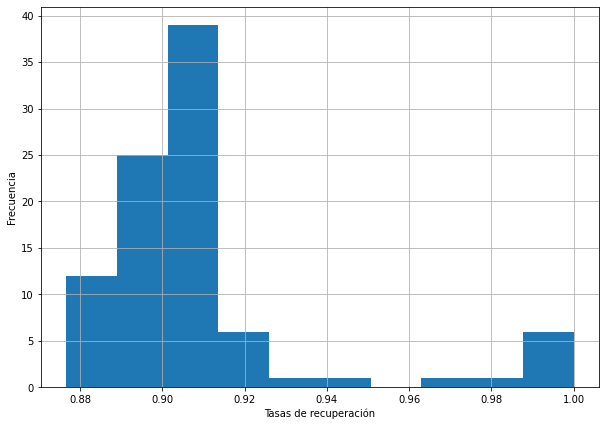

In [25]:
# Graficamos un histograma de frecuencias
df_Mexico['rate'].hist(figsize=(10,7) , bins = 10)

plt.xlabel('Tasas de recuperación')
plt.ylabel('Frecuencia')

Ejemplo de gráfica de función de distribución

Text(0.5, 0, 'Tasas de recuperación')

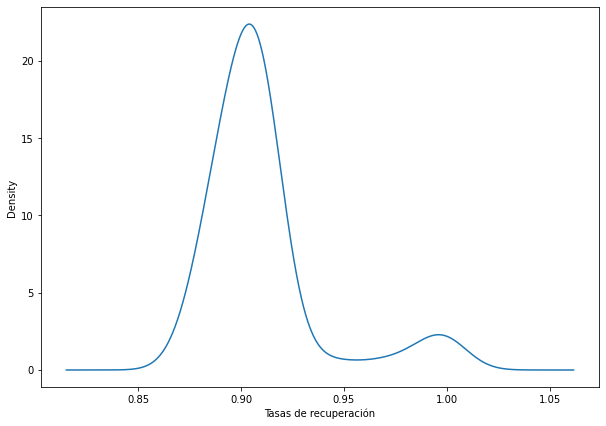

In [26]:
# Graficamos la grafica de la distribución:
df_Mexico['rate'].plot(kind = 'kde', figsize=(10,7))

plt.xlabel('Tasas de recuperación')
